## CLIM715 Homework #1

### By Austin Reed

In [69]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [70]:
def q(x,y, x_cone, y_cone, r_cone): #define a tracer function
    def r(x, y):
        return np.sqrt((x-x_cone)** 2 + (y-y_cone)** 2) #distance
    if r(x,y) >r_cone:
        result=0
    if r(x,y)<r_cone:
        result= 1-(r(x,y)/r_cone)
        return result

In [71]:
x_cone=50 #units
y_cone=80 #units
r_cone=10 #units
max_cone_height=1 #unit

In [72]:
x0=0
y0=0 #mesh center at origin
xmax=100
ymax=100
def u(x,y):
    result=-(y-y0)/xmax
    return result
def v(x,y):
    result=(x-x0)/ymax
    return result

In [73]:
num_points=100
x_extent=np.linspace(0,xmax,num_points)
y_extent=np.linspace(0,ymax,num_points)
X,Y=np.meshgrid(x_extent,y_extent)
U=u(X,Y)
V=v(X,Y)

In [74]:
print(len(X))

100


In [75]:
print(np.shape(U))

(100, 100)


In [76]:
Q = np.zeros_like((X))  # Initialize tracer values
for i in range(num_points-1):
    for j in range(num_points-1):
        Q[i, j] = q(X[i,j], Y[i,j],x_cone,y_cone,r_cone)


In [77]:
print(np.shape(Q))

(100, 100)


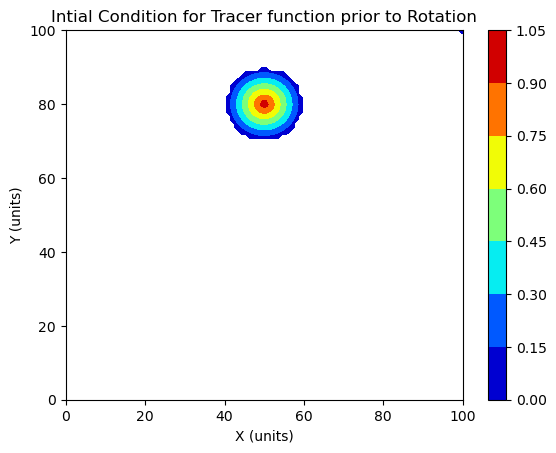

In [78]:
plt.contourf(X,Y,Q,cmap=cm.jet)
plt.colorbar()
plt.title('Intial Condition for Tracer function prior to Rotation')
plt.xlabel('X (units)')
plt.ylabel('Y (units)')
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_initial.png')

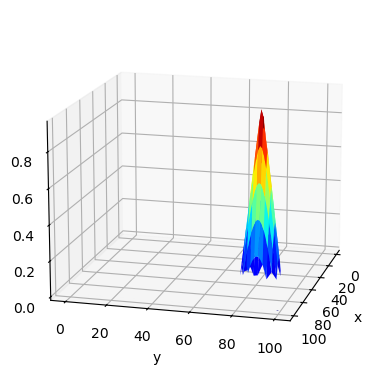

In [80]:
#Plot in 3d for different perspective
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.plot_surface(X, Y, Q,cmap=cm.jet)
ax.view_init(azim=15, elev=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_initial_3d.png')

First, consider scalar transport equation in 2D
dq/dt+Uj(x,y)dq/dxj =0
specify 2D solid body rotational flow

Solid body rotational flow is a type of flow pattern in fluid dynamics 
where the entire body of fluid rotates as a 
single, rigid unit, without any internal 
shearing or deformation. 

The velocity of the fluid particles is directly proportional to their distance 
from the axis of rotation, resulting in a linear velocity profile across
any cross-section of the flow.

ASSIGNMENT: Compare the numerical diffusion results from finite differencing schemes using:
1) forward in time, centered in space
2) centered in time, centered in space

In [56]:
#1)q_j_n+1-q_j_n/delta_t + Uj[q_j+1-q_j-1/2delta_x]=0
#2) q_j_n+1-q_j_n-1/(2delta_t)+ ... =0, where ... indicates same term as above equation

### 1, forward in time, centered in space

Run the model for A) 1 and B) 3 complete rotations

In [81]:
#1: #forward in time, centered in space
#first, specify delta_t and delta_x
delta_t=1 #time interval of 30 seconds
ntotal=3800 #final time step
delta_x=1 #grid spacing
delta_y=1
nx =100 #number of grid points
ny=100

In [86]:
#test 
'''
Q_spaceminus1 = np.zeros_like(X)  # Initialize tracer values
for i in range(num_points-1):
    for j in range(num_points-1):
        Q_spaceminus1[i-1,j-1] = Q[i-1,j-1]
'''

In [87]:
#test
'''
Q_spaceplus1 = np.zeros_like(X)  # Initialize tracer values
for i in range(num_points-1):
    for j in range(num_points-1):
        Q_spaceplus1[i+1, j+1] = Q[i+1,j+1]
'''

In [88]:
Q_spaceplus1

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       ...,
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [82]:
#time loop for forward scheme
Q_next=np.zeros_like(X)
Q_next_u=np.zeros_like(X)
Q_next_v=np.zeros_like(Y)

In [83]:
for n in range(0,ntotal):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            Q_next_u=U[i,j]*(delta_t/2*delta_x)*(Q[i+1,j]-Q[i-1,j]) #U component
            Q_next_v=V[i,j]*(delta_t/2*delta_y)*(Q[i,j+1]-Q[i,j-1]) #V component
            
            Q_next[i,j]= Q[i,j] - (Q_next_u+Q_next_v) # Compute Q at the next time step using forward in time scheme
            

In [84]:
Q_next

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       ...,
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [85]:
### Apply boundary conditions
Q_next[0]=Q[0]
Q_next[nx-1,ny-1]=Q[nx-1,ny-1]
#Q_next[ny-1]=Q_now[ny-1]

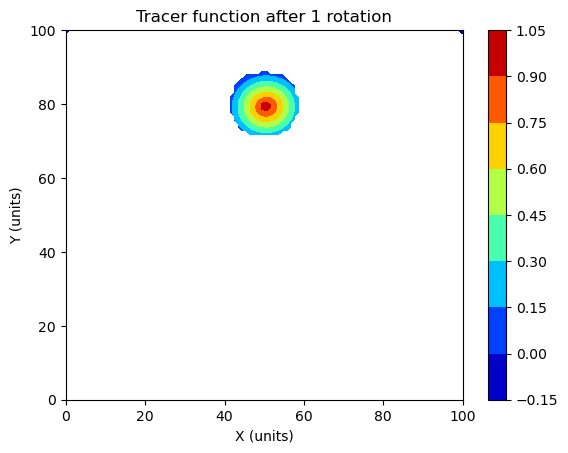

In [87]:
plt.contourf(X,Y,Q_next,cmap=cm.jet)
plt.colorbar()
plt.title('Tracer function after 1 rotation')
plt.xlabel('X (units)')
plt.ylabel('Y (units)')
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_method1_1rotation.png')

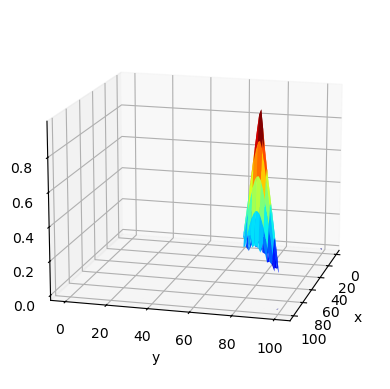

In [88]:
#Plot in 3d for different perspective
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.plot_surface(X, Y, Q_next,cmap=cm.jet)
ax.view_init(azim=15, elev=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_method1_1rotation_3d.png')

In [89]:
# result for 3 rotations
ntotal=11400 #final time step , 11,400
delta_t=1 #time interval of 30 seconds
delta_x=1 #grid spacing
delta_y=1
nx =100 #number of grid points
ny=100

In [90]:
#time loop for forward scheme
Q_next=np.zeros_like(X)
Q_next_u=np.zeros_like(X)
Q_next_v=np.zeros_like(Y)

In [91]:
for n in range(0,ntotal):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            Q_next_u=U[i,j]*(delta_t/2*delta_x)*(Q[i+1,j]-Q[i-1,j]) #U component
            Q_next_v=V[i,j]*(delta_t/2*delta_y)*(Q[i,j+1]-Q[i,j-1]) #V component
            
            Q_next[i,j]= Q[i,j] - (Q_next_u+Q_next_v) # Compute Q at the next time step using forward in time scheme
            

In [92]:
### Apply boundary conditions
Q_next[0]=Q[0]
Q_next[nx-1,ny-1]=Q[nx-1,ny-1]

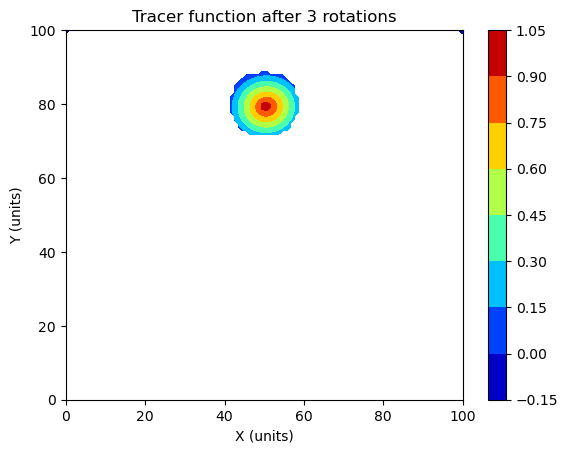

In [94]:
plt.contourf(X,Y,Q_next,cmap=cm.jet)
plt.title('Tracer function after 3 rotations')
plt.colorbar()
plt.xlabel('X (units)')
plt.ylabel('Y (units)')
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_method1_3rotation.png')

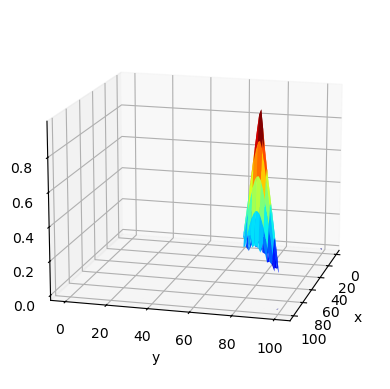

In [95]:
#Plot in 3d for different perspective
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.plot_surface(X, Y, Q_next,cmap=cm.jet)
ax.view_init(azim=15, elev=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_method1_3rotations_3d.png')

### 2: centered in time, centered in space

In [156]:
# result for 1 rotation
ntotal=3800 #final time step , 3800 for 1 rotation, 11,400 for 3 rotations
delta_t=1 #time interval of 30 seconds
delta_x=1 #grid spacing
delta_y=1
nx =100 #number of grid points
ny=100

In [157]:
#time loop for centered scheme
Q_next=np.zeros_like(X)
#Q_now=Q
Q_next_u=np.zeros_like(X)
Q_next_v=np.zeros_like(Y)

In [158]:
Q_past=np.zeros_like(X)
for n in range(0,ntotal):
    if n==0:
        Q_past=Q_past
    if n>0:
        Q_past=Q #initialize Q_past to be Q at time-1
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            # Compute spatial differences using central differences
            d_q_dx = (Q[i + 1, j] - Q[i - 1, j]) / (2*delta_x)
            d_q_dy = (Q[i, j + 1] - Q[i, j - 1]) / (2*delta_y)
            # Update q for the next time step
            Q_next[i, j] = Q_past[i,j] - delta_t * (U[i, j] * d_q_dx + V[i, j] * d_q_dy)

In [159]:
### Apply boundary conditions
Q_next[0]=Q[0]
Q_next[nx-1]=Q[nx-1]
Q_next[ny-1]=Q[ny-1]

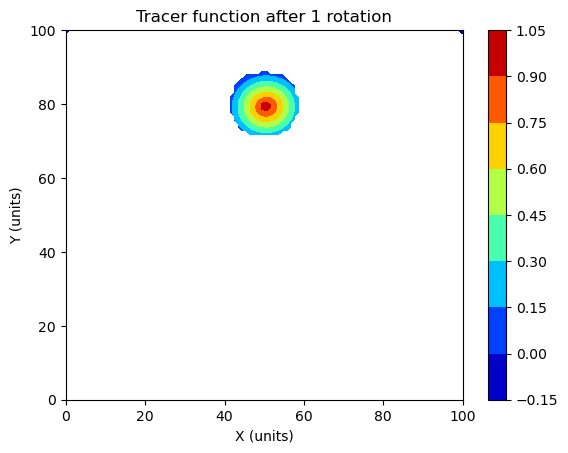

In [160]:
plt.contourf(X,Y,Q_next,cmap=cm.jet)
plt.title('Tracer function after 1 rotation')
plt.colorbar()
plt.xlabel('X (units)')
plt.ylabel('Y (units)')
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_method2_1rotation.png')

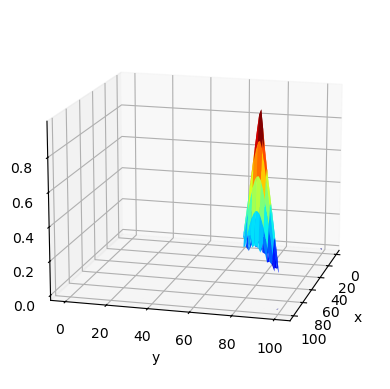

In [161]:
#Plot in 3d for different perspective
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.plot_surface(X, Y, Q_next,cmap=cm.jet)
ax.view_init(azim=15, elev=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_method2_1rotation_3d.png')

In [147]:
# result for 3 rotations
ntotal=11400 #final time step , 3800 for 1 rotation, 11,400 for 3 rotations
delta_t=1 #time interval of 30 seconds
delta_x=1 #grid spacing
delta_y=1
nx =100 #number of grid points
ny=100

In [148]:
#time loop for centered scheme
Q_next=np.zeros_like(X)
#Q_now=Q
Q_next_u=np.zeros_like(X)
Q_next_v=np.zeros_like(Y)

In [149]:
Q_past=np.zeros_like(X)
for n in range(0,ntotal):
    if n==0:
        Q_past=Q_past
    if n>0:
        Q_past=Q #initialize Q_past to be Q at time-1
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            # Compute spatial differences using central differences
            d_q_dx = (Q[i + 1, j] - Q[i - 1, j]) / (2*delta_x)
            d_q_dy = (Q[i, j + 1] - Q[i, j - 1]) / (2*delta_y)
            # Update q for the next time step
            Q_next[i, j] = Q_past[i, j] - delta_t * (U[i, j] * d_q_dx + V[i, j] * d_q_dy)

In [150]:
### Apply boundary conditions
Q_next[0]=Q[0]
Q_next[nx-1]=Q[nx-1]
Q_next[ny-1]=Q[ny-1]

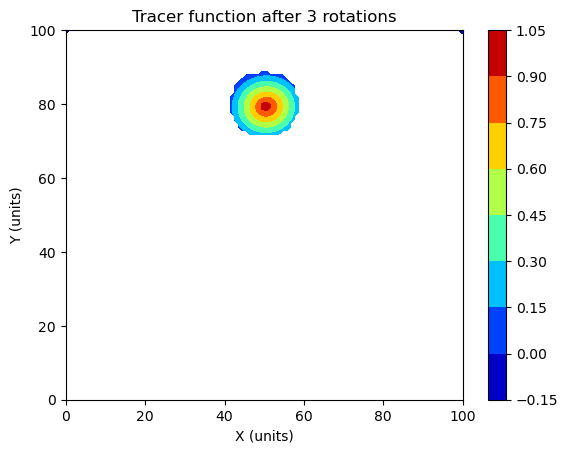

In [152]:
plt.contourf(X,Y,Q_next,cmap=cm.jet)
plt.title('Tracer function after 3 rotations')
plt.colorbar()
plt.xlabel('X (units)')
plt.ylabel('Y (units)')
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_method2_3rotations.png')

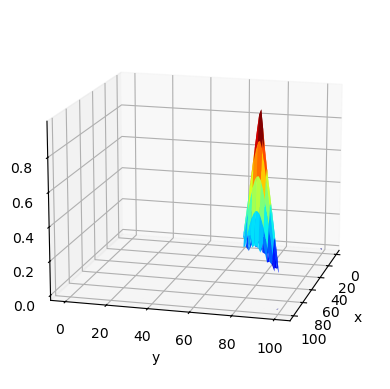

In [153]:
#Plot in 3d for different perspective
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection='3d')
ax.plot_surface(X, Y, Q_next,cmap=cm.jet)
ax.view_init(azim=15, elev=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.savefig('/home/areed29/summer23_notebooks/CLIM715/cone_method2_3rotations_3d.png')